<a href="https://colab.research.google.com/github/asmit-ayank/UCS420/blob/main/Assignment%2010/Assignment_10_UCS420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).**
1. Convert text to lowercase and remove punctution using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribution (excluding stopwords).

In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

text = "I love learning about machine learning. It's an exciting field with endless possibilities!"

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#1.
text_cleaned = re.sub(r'[^\w\s]', '', text.lower())
print(text_cleaned)

i love learning about machine learning its an exciting field with endless possibilities


In [9]:
#2.
word_tokens = word_tokenize(text_cleaned)
sentence_tokens = sent_tokenize(text)
print("Word Tokens:", word_tokens)
print("Sentences:", sentence_tokens)

Word Tokens: ['i', 'love', 'learning', 'about', 'machine', 'learning', 'its', 'an', 'exciting', 'field', 'with', 'endless', 'possibilities']
Sentences: ['I love learning about machine learning.', "It's an exciting field with endless possibilities!"]


In [10]:
#3.
split_words = text_cleaned.split()
word_tokens_nltk = nltk.word_tokenize(text_cleaned)
print("Split:", split_words)
print("Tokens using word_tokenize():", word_tokens_nltk)

Split: ['i', 'love', 'learning', 'about', 'machine', 'learning', 'its', 'an', 'exciting', 'field', 'with', 'endless', 'possibilities']
Tokens using word_tokenize(): ['i', 'love', 'learning', 'about', 'machine', 'learning', 'its', 'an', 'exciting', 'field', 'with', 'endless', 'possibilities']


In [11]:
#4.
stop_words = set(stopwords.words('english'))
filtered = [w for w in word_tokens if w not in stop_words]
print("Without Stopwords:", filtered)

Without Stopwords: ['love', 'learning', 'machine', 'learning', 'exciting', 'field', 'endless', 'possibilities']


In [12]:
#5.
freq = Counter(filtered)
print("Frequency:", freq)

Frequency: Counter({'learning': 2, 'love': 1, 'machine': 1, 'exciting': 1, 'field': 1, 'endless': 1, 'possibilities': 1})


**Q2. Using the same paragraph from Q1:**
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmaƟzaƟon with WordNetLemmaƟzer
5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over
the other.

In [13]:
#1.
import re
words_only_alpha = re.findall(r'\b[a-zA-Z]+\b', text.lower())
print("Words with only alphabets:", words_only_alpha)

Words with only alphabets: ['i', 'love', 'learning', 'about', 'machine', 'learning', 'it', 's', 'an', 'exciting', 'field', 'with', 'endless', 'possibilities']


In [14]:
#2.
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_alpha_words = [word for word in words_only_alpha if word not in stop_words]
print("Filtered words without stopwords:", filtered_alpha_words)

Filtered words without stopwords: ['love', 'learning', 'machine', 'learning', 'exciting', 'field', 'endless', 'possibilities']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#3.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_alpha_words]
print("Stemmed words:", stemmed_words)

Stemmed words: ['love', 'learn', 'machin', 'learn', 'excit', 'field', 'endless', 'possibl']


In [16]:
#4.
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha_words]
print("Lemmatized words:", lemmatized_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatized words: ['love', 'learning', 'machine', 'learning', 'exciting', 'field', 'endless', 'possibility']


In [17]:
#5.
for stem, lemma in zip(stemmed_words, lemmatized_words):
 print(f"Stemmed: {stem}, Lemmatized: {lemma}")

Stemmed: love, Lemmatized: love
Stemmed: learn, Lemmatized: learning
Stemmed: machin, Lemmatized: machine
Stemmed: learn, Lemmatized: learning
Stemmed: excit, Lemmatized: exciting
Stemmed: field, Lemmatized: field
Stemmed: endless, Lemmatized: endless
Stemmed: possibl, Lemmatized: possibility


**Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).**
1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [18]:
texts = [
    "Machine learning is amazing and powerful.",
    "Python makes machine learning easier.",
    "I love learning machine learning!"
]

In [21]:
#1.
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(texts)
words = count_vectorizer.get_feature_names_out()
bag_of_words_array = bag_of_words.toarray()

print("Bag of Words Representation (CountVectorizer):")
print(bag_of_words_array)
print("Words (features):", words)

Bag of Words Representation (CountVectorizer):
[[1 1 0 1 1 0 1 0 1 0]
 [0 0 1 0 1 0 1 1 0 1]
 [0 0 0 0 2 1 1 0 0 0]]
Words (features): ['amazing' 'and' 'easier' 'is' 'learning' 'love' 'machine' 'makes'
 'powerful' 'python']


In [22]:
#2.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

print("\nTF-IDF Scores (TfidfVectorizer):")
print(tfidf_array)
print("Words (features):", tfidf_words)


TF-IDF Scores (TfidfVectorizer):
[[0.46138073 0.46138073 0.         0.46138073 0.27249889 0.
  0.27249889 0.         0.46138073 0.        ]
 [0.         0.         0.52004008 0.         0.30714405 0.
  0.30714405 0.52004008 0.         0.52004008]
 [0.         0.         0.         0.         0.71307037 0.60366655
  0.35653519 0.         0.         0.        ]]
Words (features): ['amazing' 'and' 'easier' 'is' 'learning' 'love' 'machine' 'makes'
 'powerful' 'python']


In [23]:
#3.
import numpy as np

print("\nTop 3 Keywords Using TF-IDF:")

for i, text in enumerate(texts):
    tfidf_scores = tfidf_array[i]

    top_3_indices = np.argsort(tfidf_scores)[::-1][:3]

    top_3_keywords = [tfidf_words[index] for index in top_3_indices]

    print(f"Text {i+1}: '{text}'")
    print("Top 3 Keywords:", top_3_keywords)
    print()


Top 3 Keywords Using TF-IDF:
Text 1: 'Machine learning is amazing and powerful.'
Top 3 Keywords: ['powerful', 'and', 'is']

Text 2: 'Python makes machine learning easier.'
Top 3 Keywords: ['python', 'makes', 'easier']

Text 3: 'I love learning machine learning!'
Top 3 Keywords: ['learning', 'love', 'machine']



Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:

 a. Jaccard Similarity using sets

 b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

 c. Analyze which similarity metric gives beƩer insights in your case.

In [24]:
txt1 = "Machine learning is fun and exciting"
txt2 = "Learning about machine intelligence is cool"

In [26]:
#1.
import nltk
import re
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def preprocess_and_tokenize(text):
    text_clean = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text_clean)
    return tokens

tokens_text1 = preprocess_and_tokenize(txt1)
tokens_text2 = preprocess_and_tokenize(txt2)

print("Tokens for Text 1:", tokens_text1)
print("Tokens for Text 2:", tokens_text2)

Tokens for Text 1: ['machine', 'learning', 'is', 'fun', 'and', 'exciting']
Tokens for Text 2: ['learning', 'about', 'machine', 'intelligence', 'is', 'cool']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


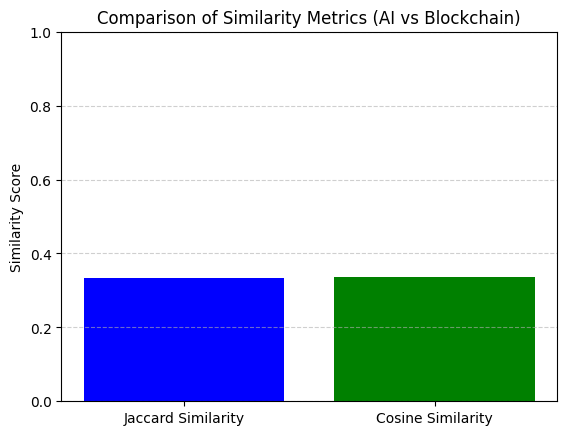

Jaccard Similarity: 0.333
Cosine Similarity: 0.336
✔️ Cosine similarity gives better insight here because it captures the difference in vocabulary and semantic context.


In [29]:
#2.
# a. Jaccard Similarity using sets
set1 = set(txt1.lower().split()) # Changed text1 to txt1
set2 = set(txt2.lower().split()) # Changed text2 to txt2
jaccard_similarity = len(set1 & set2) / len(set1 | set2)


# b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([txt1, txt2]) # Changed text1 and text2 to txt1 and txt2 respectively
cosine_sim = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]


# c. Analyze which similarity metric gives beƩer insights in your case.
import matplotlib.pyplot as plt

similarity_scores = [jaccard_similarity, cosine_sim]
labels = ['Jaccard Similarity', 'Cosine Similarity']

plt.bar(labels, similarity_scores, color=['blue', 'green'])
plt.title("Comparison of Similarity Metrics (AI vs Blockchain)")
plt.ylabel("Similarity Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Step 5: Print scores
print(f"Jaccard Similarity: {jaccard_similarity:.3f}")
print(f"Cosine Similarity: {cosine_sim:.3f}")

# Step 6: Analysis
if cosine_sim > jaccard_similarity:
    print("✔️ Cosine similarity gives better insight here because it captures the difference in vocabulary and semantic context.")
else:
    print("✔️ Jaccard similarity gives better insight in this case.")

Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2. Classify reviews into PosiƟve / NegaƟve / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews.

Review: 'This app is excellent and very helpful.' → Positive (0.60)
Review: 'It crashed and I lost all my data.' → Neutral (0.00)
Review: 'Average performance, nothing special.' → Positive (0.10)
Review: 'The interface is clean and easy to use.' → Positive (0.40)


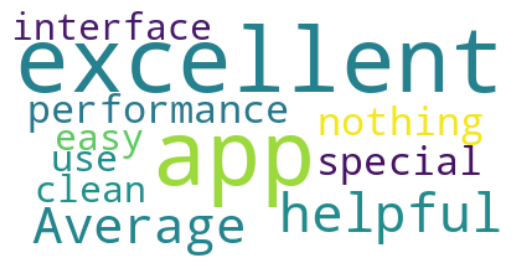

In [30]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This app is excellent and very helpful.",
    "It crashed and I lost all my data.",
    "Average performance, nothing special.",
    "The interface is clean and easy to use."
]

positive_text = ""
for r in reviews:
    blob = TextBlob(r)
    sentiment = blob.sentiment.polarity
    if sentiment > 0.1:
        print(f"Review: '{r}' → Positive ({sentiment:.2f})")
        positive_text += r + " "
    elif sentiment < -0.1:
        print(f"Review: '{r}' → Negative ({sentiment:.2f})")
    else:
        print(f"Review: '{r}' → Neutral ({sentiment:.2f})")

# Word Cloud for Positive Reviews
wordcloud = WordCloud(background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide.

In [38]:
paragraph = """
Star Wars is a legendary science fiction saga created by George Lucas.
The story follows the adventures of characters like Luke Skywalker, Princess Leia, and Darth Vader in a galaxy far, far away.
The Force, a mysterious energy field, plays a central role in shaping the destinies of heroes and villains alike.
The original trilogy, the prequels, and the sequels have captivated audiences worldwide.
Lightsabers, epic space battles, and deep moral struggles make Star Wars a timeless tale of hope, redemption, and the eternal fight between good and evil.
"""

In [40]:
#1.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])

total_words = len(tokenizer.word_index) + 1
print("Total words:", total_words)

input_sequences = []
for line in paragraph.split('.'):
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

from tensorflow.keras.utils import to_categorical
ys = to_categorical(labels, num_classes=total_words)

Total words: 68


In [41]:
#2.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(xs, ys, epochs=50, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2993 - loss: 2.6763
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3579 - loss: 2.5370
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3622 - loss: 2.5253
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3484 - loss: 2.4348
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3093 - loss: 2.4541
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4074 - loss: 2.3191
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3860 - loss: 2.2924
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4485 - loss: 2.1674
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4704 - loss: 2.1931
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4764 - loss: 2.1754
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4980 - loss: 2.1011
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4900 - loss: 2.0272
E

In [44]:
#3.
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

seed_word = "Force"
print(generate_text(seed_word, 15, model, max_sequence_len))

Force a a a a legendary saga created created by lucas lucas lucas lucas lucas lucas
